In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Printing the Data

In [3]:
df = pd.read_csv("train_preprocessed.csv")
df.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


Model(1):Mult-labels with Logistic Regression Model

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

           Model  Accuracy  True Pos  False Pos  True Neg  False Neg
0  identity_hate      99.2      66.3       33.7      99.3        0.7
1         insult      97.1      83.2       16.8      97.6        2.4
2        obscene      97.8      90.2        9.8      98.1        1.9
3   severe_toxic      99.0      53.4       46.6      99.2        0.8
4         threat      99.7      76.9       23.1      99.7        0.3
5          toxic      95.8      91.7        8.3      96.1        3.9
6       toxicity      92.0      74.6       25.4      96.7        3.3


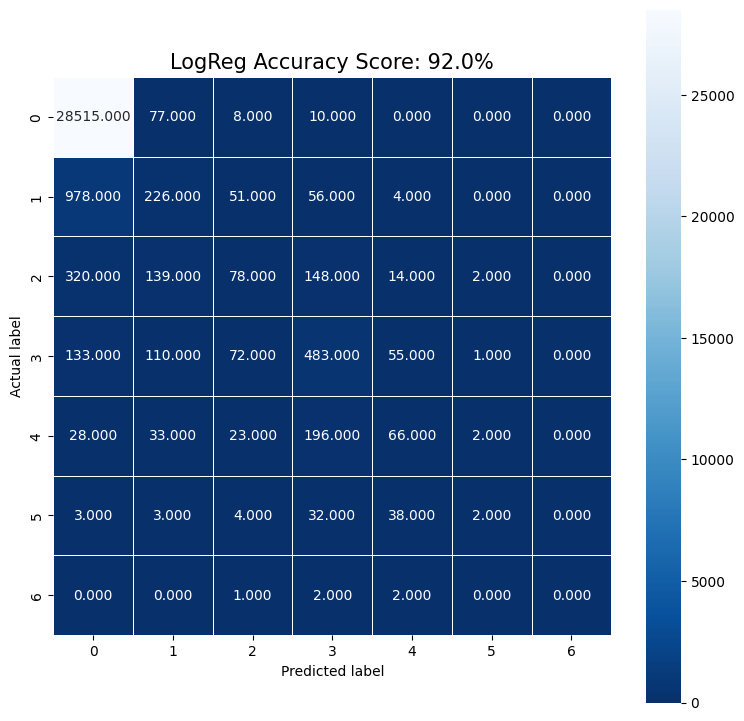

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def update_accuracy(cm, acc, label):
    df = [1,2,3,4,5,6]
    FP = float(cm[0][1])
    TP = float(cm[1][1])
    FN = float(cm[1][0])
    TN = float(cm[0][0])
    TPR = (TP/(TP+FP))*100
    FPR = 100 - TPR
    TNR = (TN/(TN+FN))*100
    FNR = 100 - TNR
    df[0] = label
    df[1] = round(float(acc*100),1)
    df[2] = round(float(TPR),1)
    df[3] = round(float(FPR),1)
    df[4] = round(float(TNR),1)
    df[5] = round(float(FNR),1)
    return df

df = pd.read_csv("train_preprocessed.csv")
x_df = df['comment_text']
y_df = df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic', 'toxicity']]
labels = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic', 'toxicity']
accuracy_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'True Pos', 'False Pos', 'True Neg', 'False Neg'])

for label in labels:
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit_transform(x_df)
    freq_term_matrix = count_vectorizer.transform(x_df)
    tfidf = TfidfTransformer(norm = "l2")
    tfidf.fit(freq_term_matrix)
    tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y_df[label], test_size = 0.2, random_state=0)

    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    logreg_pred = logreg.predict(x_test)

    logreg_accuracy = accuracy_score(y_test,logreg_pred)
    logreg_cm = confusion_matrix(y_test, logreg_pred)

    accuracy_list = update_accuracy(logreg_cm, logreg_accuracy, label)
    accuracy_df.loc[len(accuracy_df)] = accuracy_list

plt.figure(figsize=(9,9))
sns.heatmap(logreg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'LogReg Accuracy Score: {0:.1f}%'.format(logreg_accuracy*100)
plt.title(all_sample_title, size = 15)

print(accuracy_df)



Comparison of different models in Single label

In [14]:
# Example 'insult'
x_df = df['comment_text']
y_df = df['insult']

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y_df, test_size = 0.2, random_state=0)

In [5]:
accuracy_df = pd.DataFrame(columns = ['Model', 'Accuracy', ' True Pos', 'False Pos', 'True Neg', 'False Neg'])
def update_accuracy(cm, acc, model):
    df = [1,2,3,4,5,6]
    FP = float(cm[0][1])
    TP = float(cm[1][1])
    FN = float(cm[1][0])
    TN = float(cm[0][0])
    TPR = (TP/(TP+FP))*100
    FPR = 100 - TPR
    TNR = (TN/(TN+FN))*100
    FNR = 100 - TNR
    df[0] = model
    df[1] = round(float(acc*100),1)
    df[2] = round(float(TPR),1)
    df[3] = round(float(FPR),1)
    df[4] = round(float(TNR),1)
    df[5] = round(float(FNR),1)
    return df

Model (1) : Logistic Regression Model

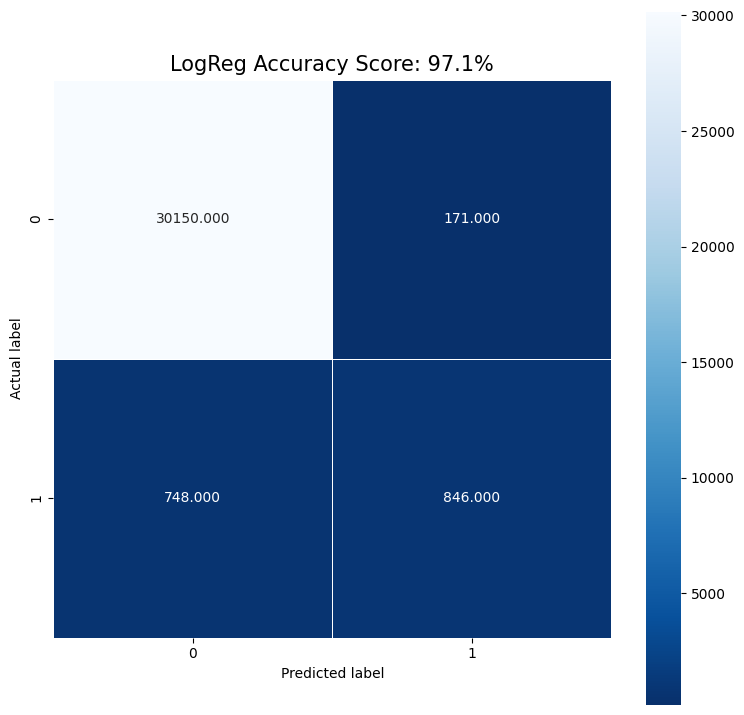

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_pred)
logreg_cm = metrics.confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(9,9))
sns.heatmap(logreg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'LogReg Accuracy Score: {0:.1f}%'.format(logreg_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(logreg_cm, logreg_accuracy, "Log Reg")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

Model (2) : Naive-Bayes Prediction Mode

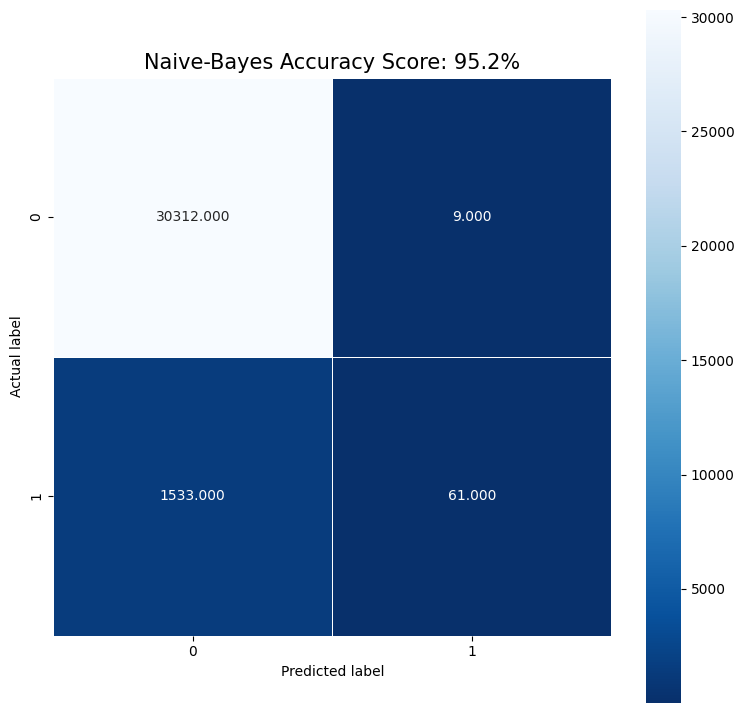

In [7]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)

nb_pred = NB.predict(x_test)
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_cm = metrics.confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(9,9))
sns.heatmap(nb_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Naive-Bayes Accuracy Score: {0:.1f}%'.format(nb_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(nb_cm, nb_accuracy, "Naive-Bayes")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

Model (3) : Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

tree_pred = clf.predict(x_test)
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(9,9))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Decision Tree Accuracy Score: {0:.1f}%'.format(tree_accuracy*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(tree_cm, tree_accuracy, "Decision Tree")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

Model (4) : Passive-Aggressive Classifier Model

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag = PassiveAggressiveClassifier(max_iter=50)
pag.fit(x_train,y_train)

pag_pred = pag.predict(x_test)
pag_accuracy = accuracy_score(y_test,pag_pred)
pag_cm = metrics.confusion_matrix(y_test, pag_pred)

plt.figure(figsize=(9,9))
sns.heatmap(pag_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Pas-Agg Accuracy Score: {0:.1f}%'.format(float(pag_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(pag_cm, pag_accuracy, "Pas-Agg")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

Model (5) : Support Vector Machine Classifier Model

In [ ]:
from sklearn import svm
svmclf = svm.SVC(kernel='linear')
svmclf.fit(x_train,y_train)

svm_pred = svmclf.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SVM Accuracy Score: {0:.1f}%'.format(float(svm_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(svm_cm, svm_accuracy, "SVM")
accuracy_df.loc[len(accuracy_df)] = accuracy_list

Model (6) : Ensemble

In [ ]:
ensemble_pred = [None] * len(pag_pred)

for i in range(0,len(pag_pred)):
    total = logreg_pred[i] + nb_pred[i] + tree_pred[i] + pag_pred[i] + svm_pred[i]
    if total >= 3:
        ensemble_pred[i] = 1
    else:
        ensemble_pred[i] = 0

ensemble_pred = np.array(ensemble_pred)
ensemble_accuracy = accuracy_score(y_test,ensemble_pred)
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ensemble_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Ensemble Accuracy Score: {0:.1f}%'.format(float(ensemble_accuracy*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(ensemble_cm, ensemble_accuracy, "Ensemble")
accuracy_df.loc[len(accuracy_df)] = accuracy_list